In [36]:
import pandas as pd
import matplotlib.pyplot as plt

In [37]:
real_dataTSLA = pd.read_csv('TSLA.csv')
forecast_dataTSLA = pd.read_csv('tsla_forecast.csv')

In [38]:
# Объединение данных по дате
merged_dataTSLA = pd.merge(
    real_dataTSLA[['Date', 'Close']].rename(columns={'Date': 'ds', 'Close': 'actual'}),
    forecast_dataTSLA[['ds', 'yhat']].rename(columns={'yhat': 'forecast'}),
    on='ds',
    how='inner'
)

In [39]:
# Удаление строк с пропущенными значениями
merged_data = merged_dataTSLA.dropna()

# Расчет MAPE
merged_dataTSLA['error'] = abs(merged_dataTSLA['actual'] - merged_dataTSLA['forecast']) / merged_dataTSLA['actual']
mapeTSLA = merged_dataTSLA['error'].mean() * 100

In [40]:
print(f"MAPE: {mapeTSLA:.2f}%")

MAPE: 9.25%


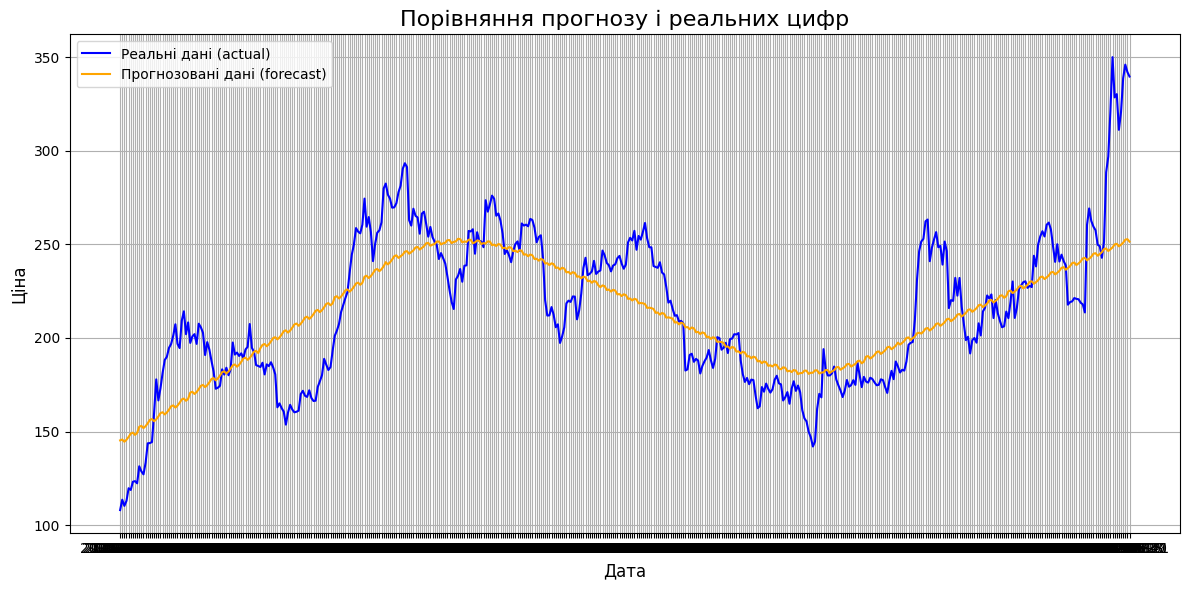

In [41]:
# Построение графиков
plt.figure(figsize=(12, 6))
plt.plot(merged_data['ds'], merged_data['actual'], label='Реальні дані (actual)', color='blue')
plt.plot(merged_data['ds'], merged_data['forecast'], label='Прогнозовані дані (forecast)', color='orange')

# Добавление подписей и легенды
plt.title('Порівняння прогнозу і реальних цифр', fontsize=16)
plt.xlabel('Дата', fontsize=12)
plt.ylabel('Ціна', fontsize=12)
plt.legend()
plt.grid(True)
plt.tight_layout()

# Отображение графика
plt.show()

In [42]:
real_dataBTC = pd.read_csv('BTC-USD.csv')
forecast_dataBTC = pd.read_csv('btc_forecast.csv')

In [43]:
# Преобразование даты в формат datetime
real_dataBTC['Date'] = pd.to_datetime(real_dataBTC['Date'])
forecast_dataBTC['ds'] = pd.to_datetime(forecast_dataBTC['ds'])


In [44]:
# Объединение данных по дате
merged_data = pd.merge(
    real_dataBTC[['Date', 'Close']].rename(columns={'Date': 'ds', 'Close': 'actual'}),
    forecast_dataBTC[['ds', 'yhat']].rename(columns={'yhat': 'forecast'}),
    on='ds',
    how='inner'
)


In [45]:
merged_data = merged_data.dropna()

# Расчет MAPE
merged_data['error'] = abs(merged_data['actual'] - merged_data['forecast']) / merged_data['actual']
mape = merged_data['error'].mean() * 100


In [46]:
print(f"MAPE: {mape:.2f}%")

MAPE: 6.74%


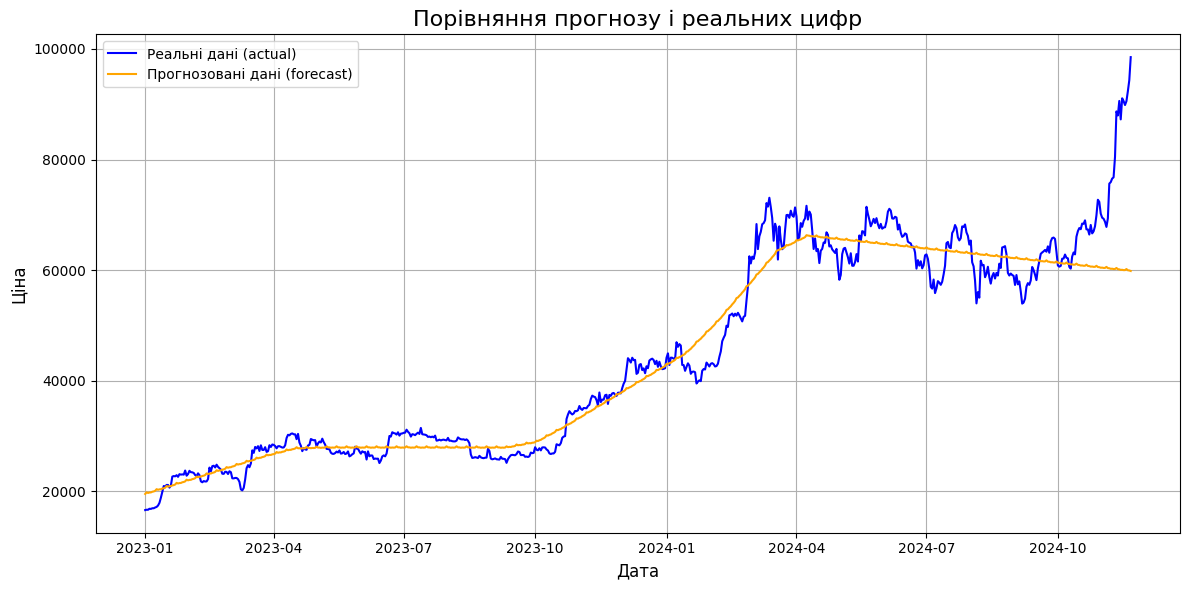

In [47]:
# Построение графиков
plt.figure(figsize=(12, 6))
plt.plot(merged_data['ds'], merged_data['actual'], label='Реальні дані (actual)', color='blue')
plt.plot(merged_data['ds'], merged_data['forecast'], label='Прогнозовані дані (forecast)', color='orange')

# Добавление подписей и легенды
plt.title('Порівняння прогнозу і реальних цифр', fontsize=16)
plt.xlabel('Дата', fontsize=12)
plt.ylabel('Ціна', fontsize=12)
plt.legend()
plt.grid(True)
plt.tight_layout()

# Отображение графика
plt.show()